In [25]:
import pandas as pd
#dataset_path = './data/lumen/export_df.parquet'

In [32]:
df = pd.read_parquet(dataset_path)
df.head()

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id
0,0,2015-07-01,2015-01-21,2015-07-01,None,2,0.0,PRT,0,0,100.000000,Check-Out,1313223,1077152
1,0,2015-07-01,2015-06-10,2015-07-01,None,2,0.0,PRT,0,0,100.000000,Check-Out,1313224,1017906
2,0,2015-07-01,2015-05-13,2015-07-02,None,1,0.0,GBR,0,1,64.991345,Check-Out,1313225,1039896
3,0,2015-07-01,2014-05-30,2015-07-02,None,1,0.0,GBR,1,1,74.368897,Check-Out,1313226,1008245
4,0,2015-07-01,2014-07-06,2015-07-03,None,2,0.0,GBR,2,1,130.973278,Check-Out,1313227,1093703


In [31]:
hotel_0 = df[df['hotel_id'] == 0]
hotel_1 = df[df['hotel_id'] == 1]

In [41]:
def calculate_daily_guests(df):
    df.loc[df['status_rezervacije'] == 'Check-Out', 'ukupno_gostiju'] = df['broj_odraslih_gostiju'] + df['broj_djece_gostiju']
    all_dates = pd.date_range(start=df['datum_dolaska'].min(), end=df['datum_odjave'].max())
    daily_guests = pd.DataFrame(index=all_dates, columns=['broj_trenutnih_gostiju'])
    daily_guests['broj_trenutnih_gostiju'] = 0
    for index, row in df.iterrows():
        end_date = row['datum_odjave'] - pd.Timedelta(days=1)
        stay_dates = pd.date_range(start=row['datum_dolaska'], end=end_date)
        for stay_date in stay_dates:
            daily_guests.loc[stay_date, 'broj_trenutnih_gostiju'] += row['ukupno_gostiju']
    daily_guests.reset_index(inplace=True)
    daily_guests.rename(columns={'index': 'datum'}, inplace=True)
    return daily_guests


In [33]:
guests_0 = calculate_daily_guests(hotel_0)
guests_1 = calculate_daily_guests(hotel_1)

In [34]:
import matplotlib.pyplot as plt

def plot_daily_guests(daily_guests):
    daily_guests.set_index('datum', inplace=True)
    plt.figure(figsize=(10, 6))
    plt.plot(daily_guests.index, daily_guests['broj_trenutnih_gostiju'], marker='o', linestyle='-', color='blue')
    plt.title('Broj Trenutnih Gostiju u Hotelu Po Danu')
    plt.xlabel('Datum')
    plt.ylabel('Broj Trenutnih Gostiju')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show() 


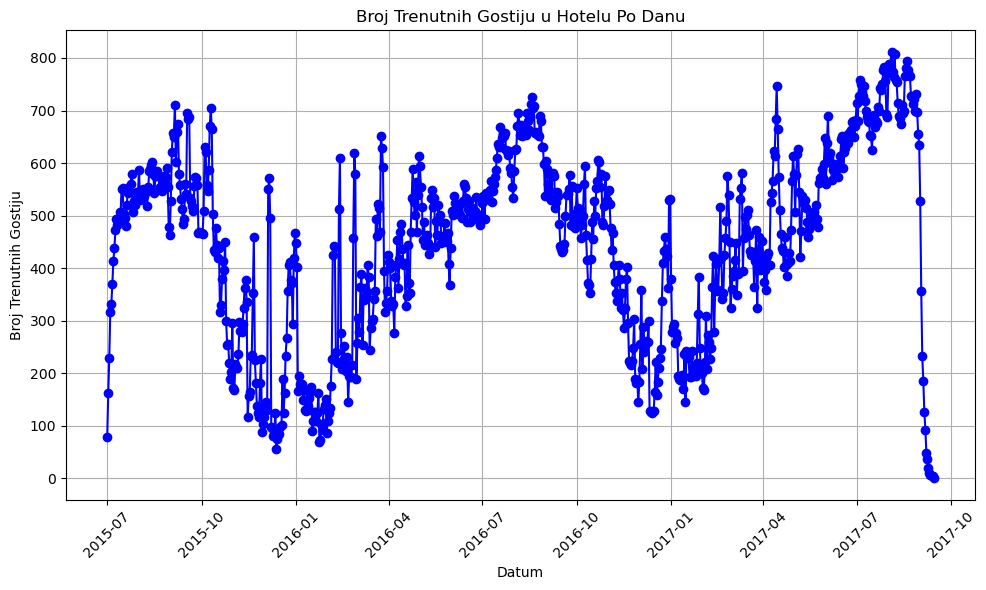

In [35]:
plot_daily_guests(guests_0)

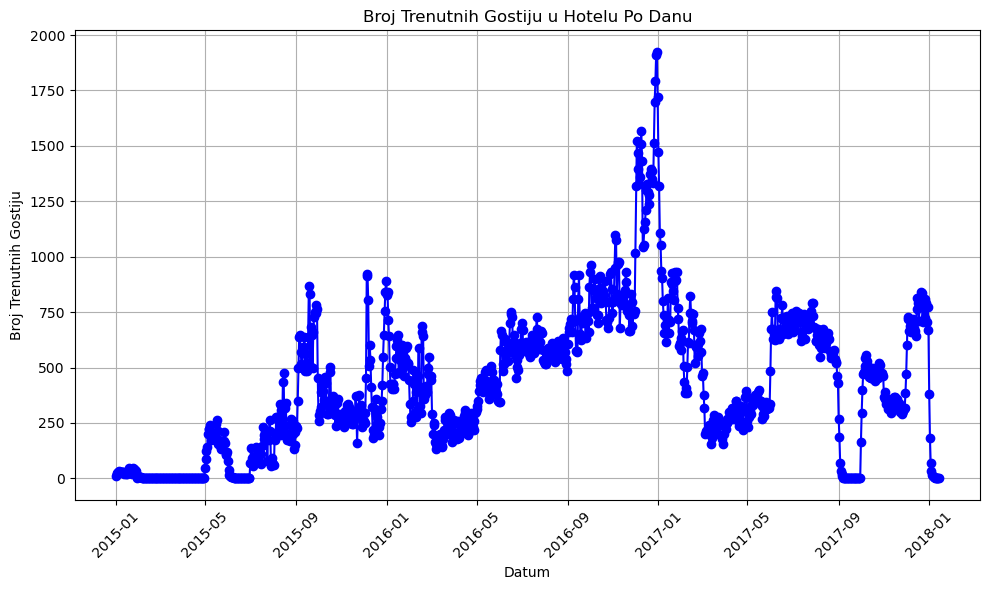

In [36]:
plot_daily_guests(guests_1)

In [58]:

def calculate_weekly_average_guests(daily_guests):
    weekly_average_guests = daily_guests.resample('W-Mon').mean()
    return weekly_average_guests

def calculate_monthly_average_guests(daily_guests):
    monthly_average_guests = daily_guests.resample('M').mean()
    return monthly_average_guests

def calculate_yearly_average_guests(daily_guests):
    yearly_average_guests = daily_guests.resample('Y').mean()
    return yearly_average_guests




In [59]:
guests_0_w = calculate_weekly_average_guests(guests_0)
guests_0_m = calculate_monthly_average_guests(guests_0)
guests_0_y = calculate_yearly_average_guests(guests_0)

guests_1_w = calculate_weekly_average_guests(guests_1)
guests_1_m = calculate_monthly_average_guests(guests_1)
guests_1_y = calculate_yearly_average_guests(guests_1)

In [71]:
def plot(daily_guests):
    plt.figure(figsize=(10, 6))
    plt.plot(daily_guests.index, daily_guests['broj_trenutnih_gostiju'], marker='o', linestyle='-', color='blue')
    plt.title('Broj Trenutnih Gostiju u Hotelu')
    plt.xlabel('Datum')
    plt.ylabel('Broj Trenutnih Gostiju')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show() 

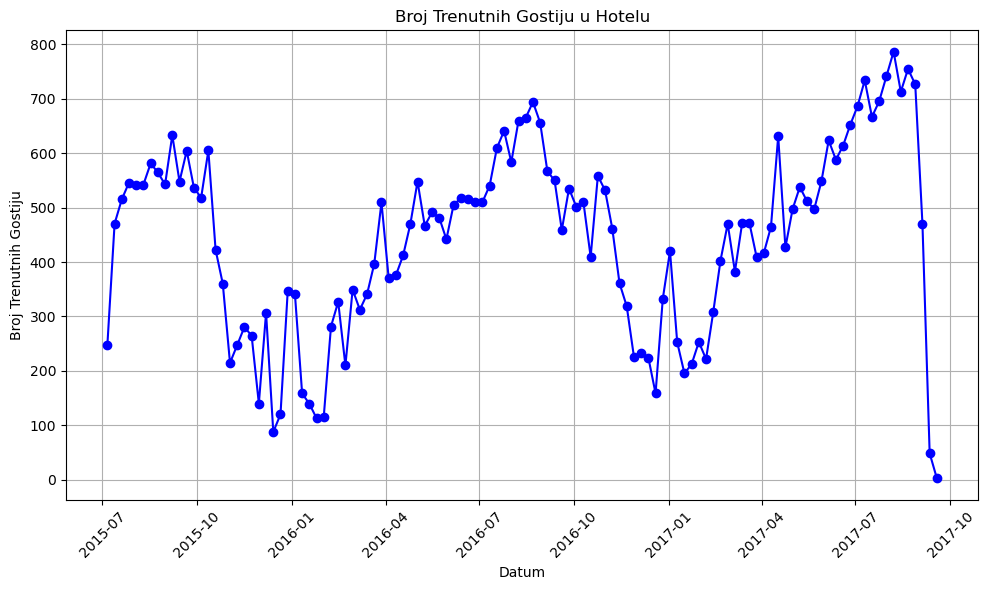

In [72]:
plot(guests_0_w)

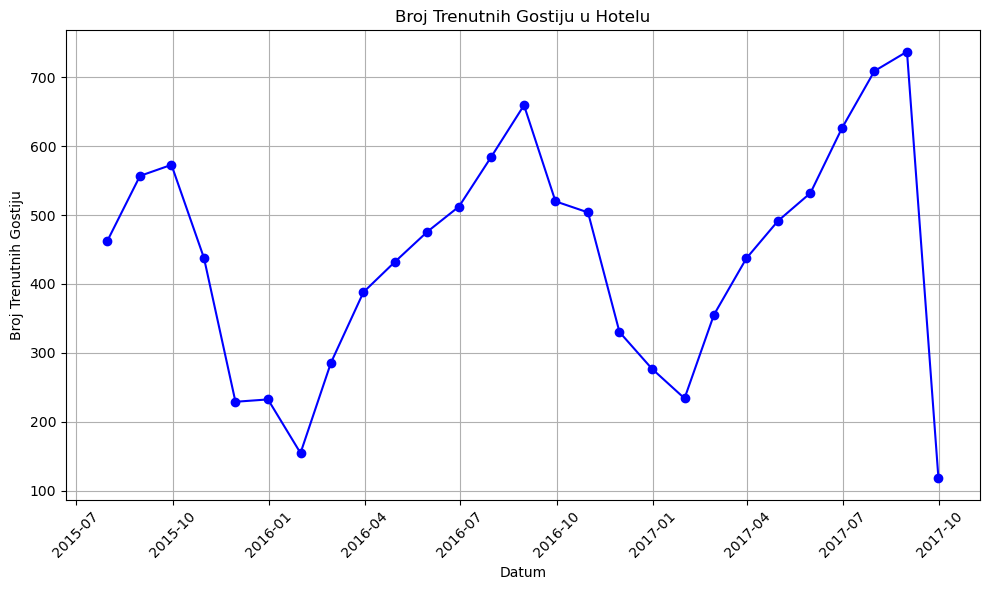

In [73]:
plot(guests_0_m)

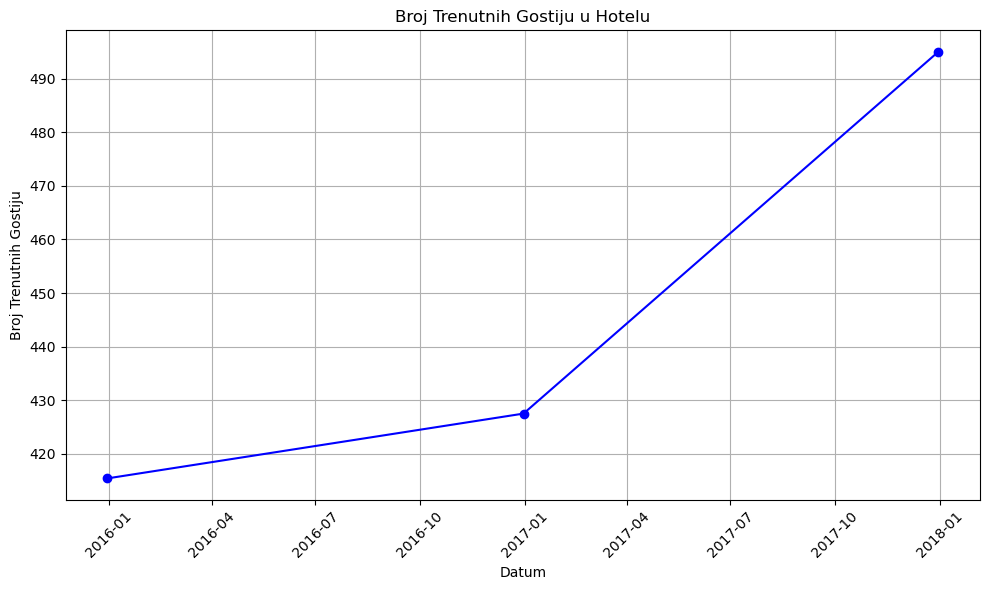

In [74]:
plot(guests_0_y)

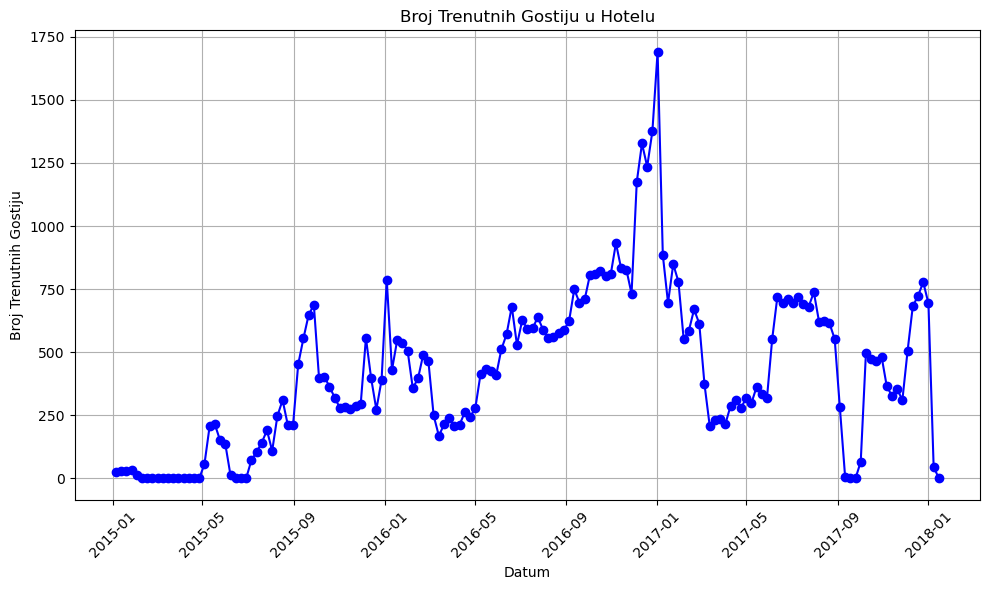

In [75]:
plot(guests_1_w)

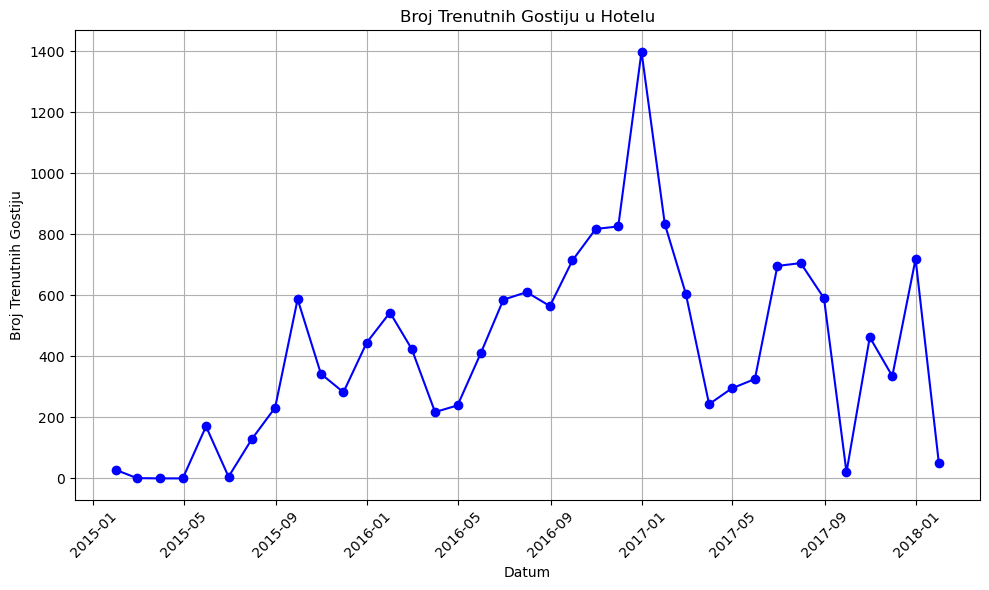

In [76]:
plot(guests_1_m)

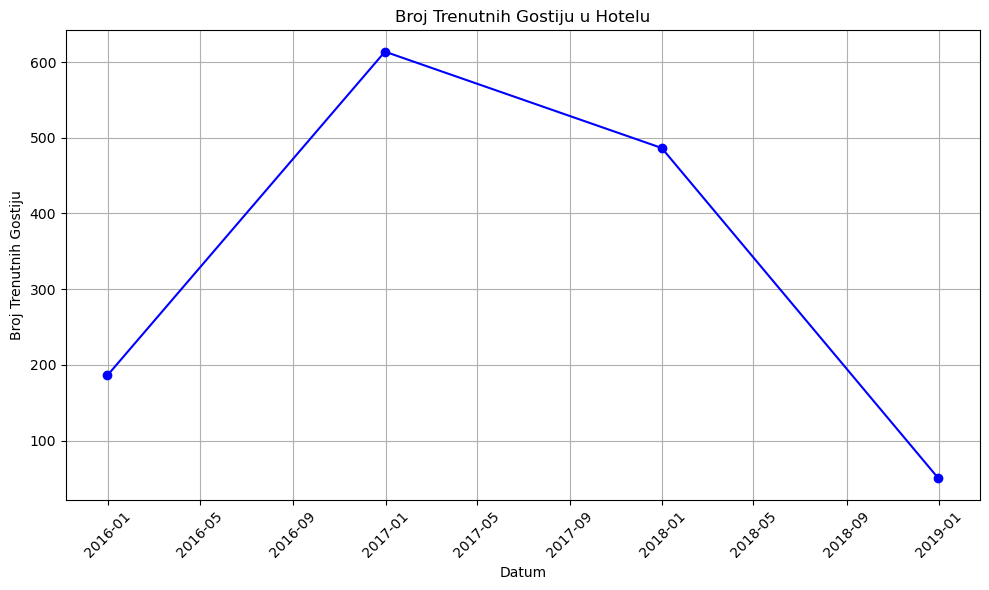

In [77]:
plot(guests_1_y)